In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [11]:
df=pd.read_csv("audi.csv")
display(df)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [12]:
print (len(df))

10668


In [13]:
display (df.shape)

(10668, 9)

In [14]:
display (df.isna().sum() )

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [15]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB
None


In [16]:
display (df.describe ())

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


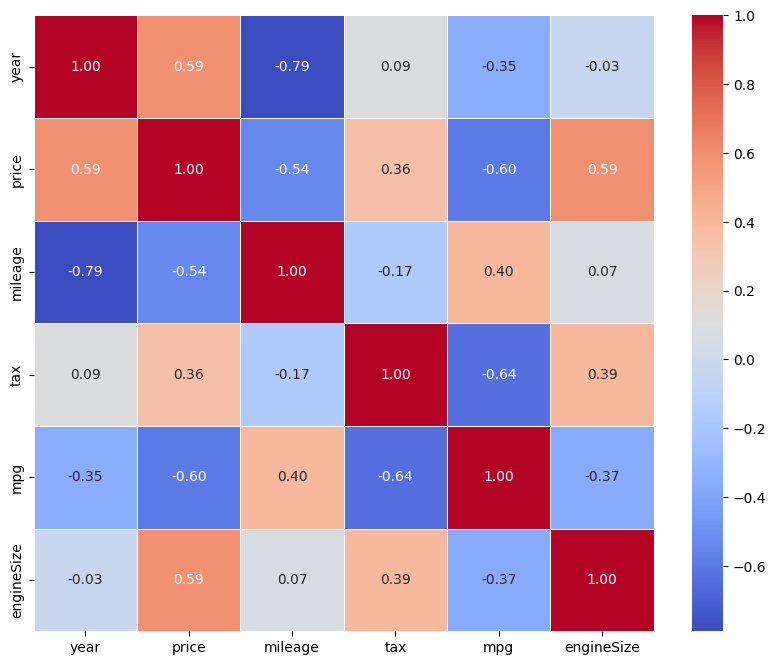

In [17]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.show()

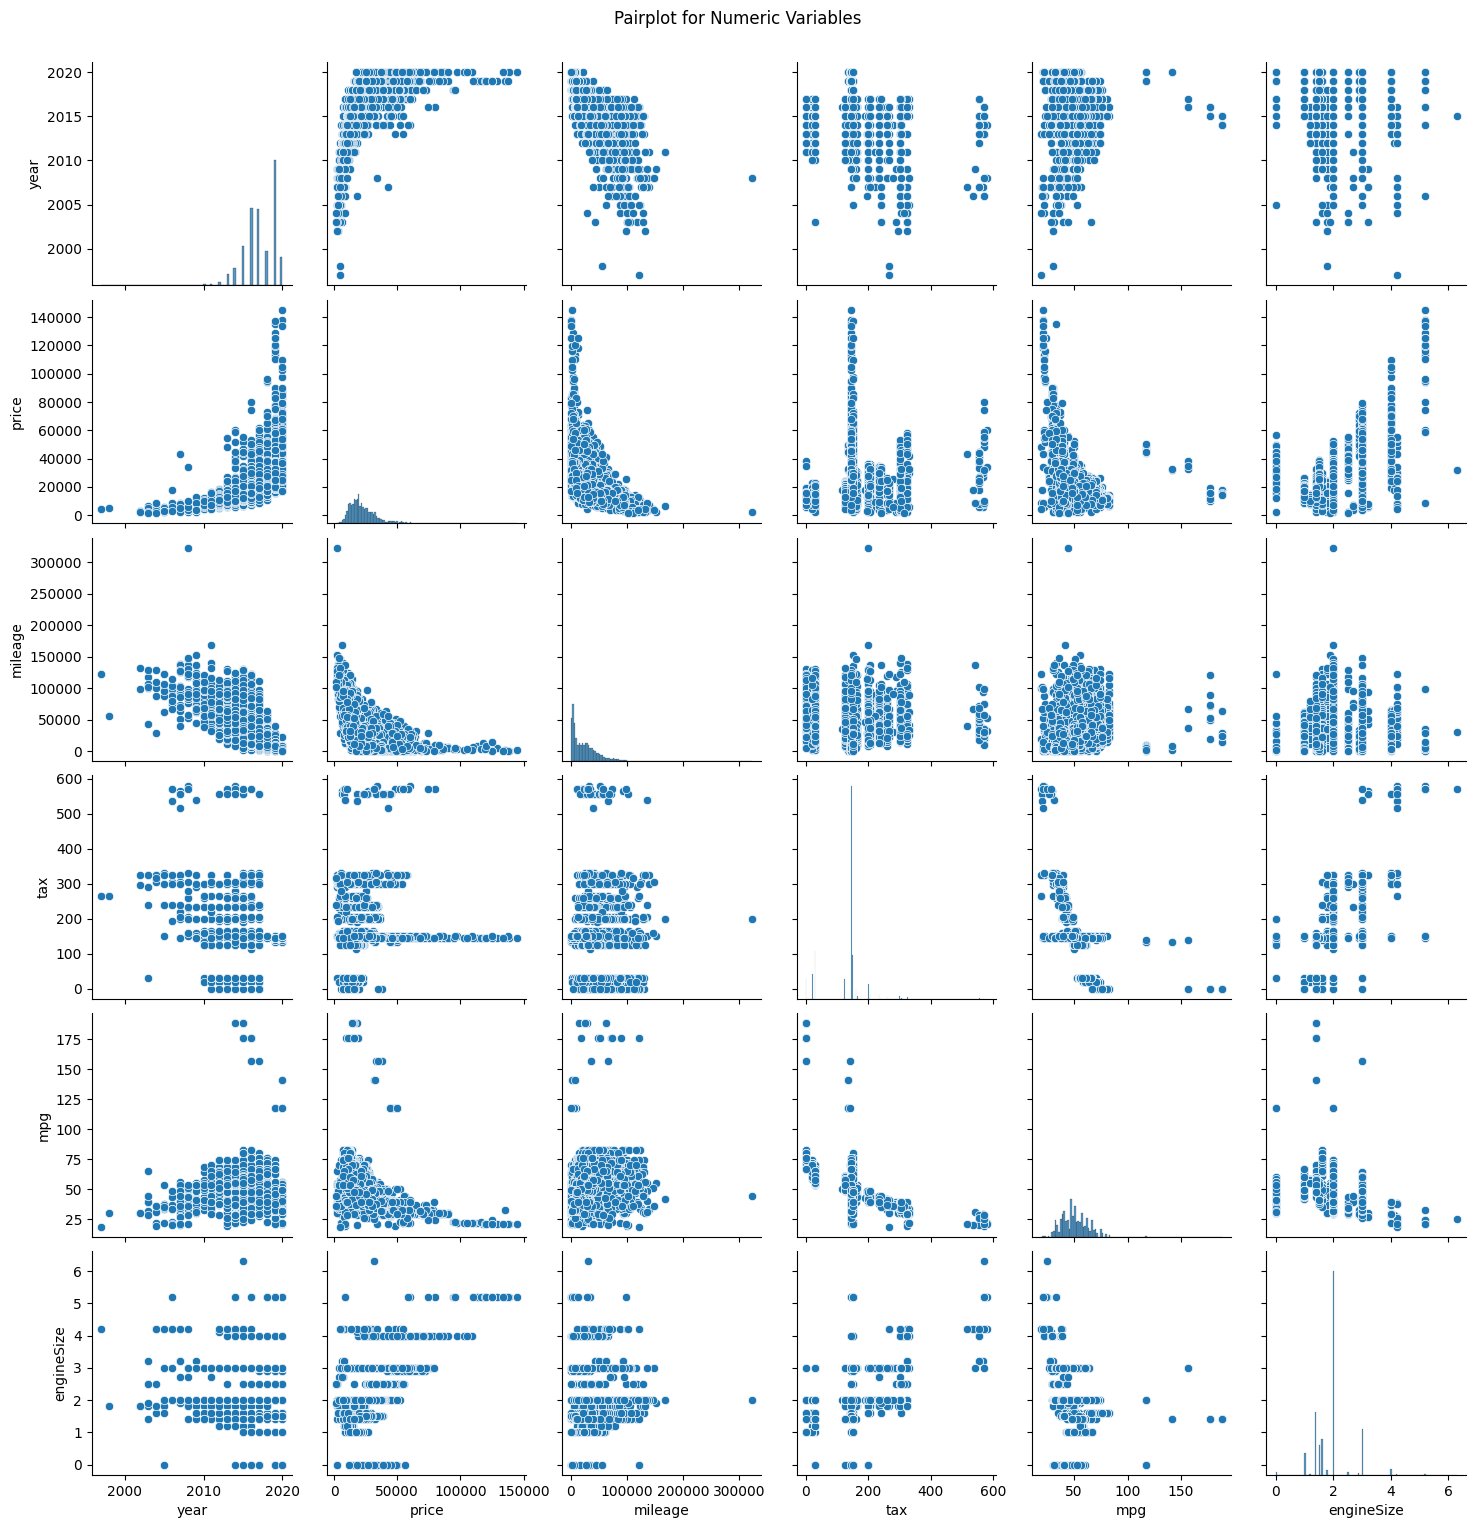

In [18]:
sns.pairplot(df[['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']])
plt.suptitle("Pairplot for Numeric Variables", y=1.02)
plt.show()

comparing price with different other columns

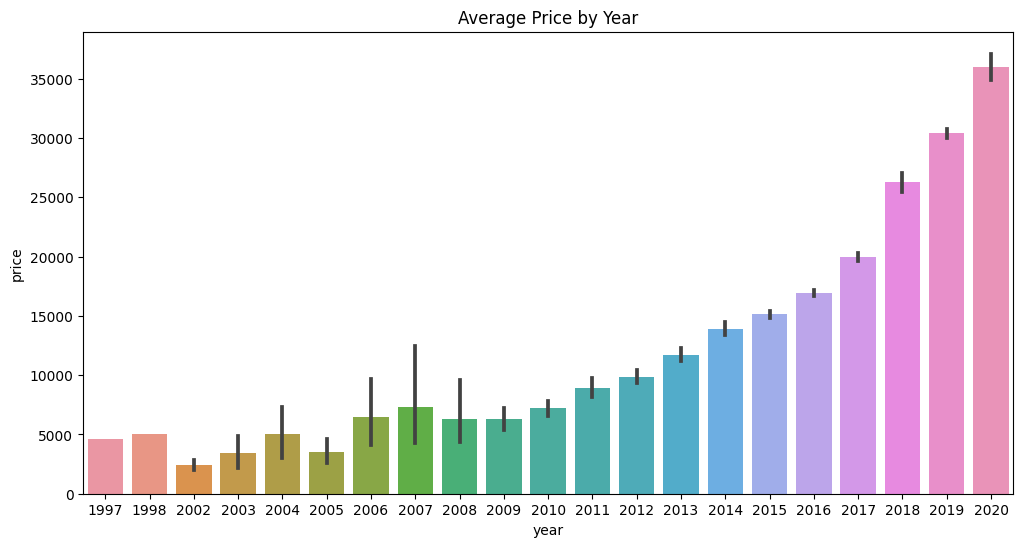

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='price', data=df)
plt.title("Average Price by Year")
plt.show()

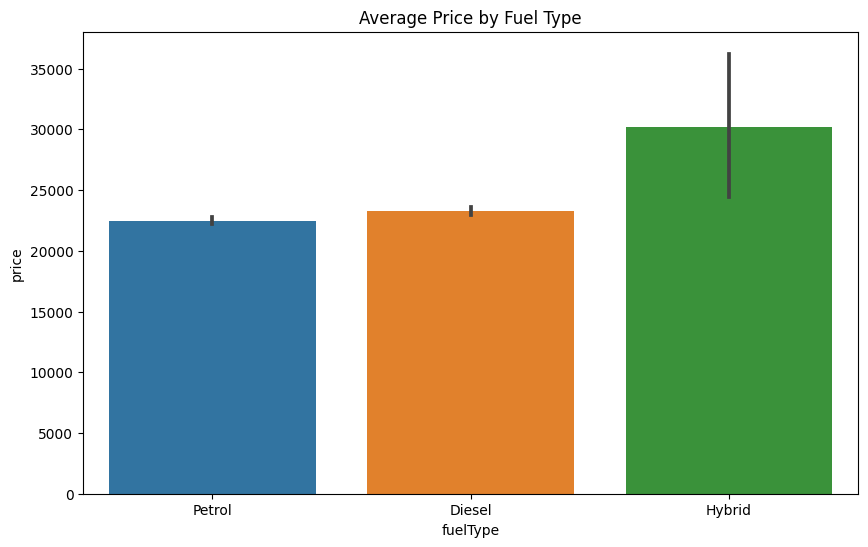

In [20]:
# Bar graph comparing 'price' with 'fuelType'
plt.figure(figsize=(10, 6))
sns.barplot(x='fuelType', y='price', data=df)
plt.title("Average Price by Fuel Type")
plt.show()

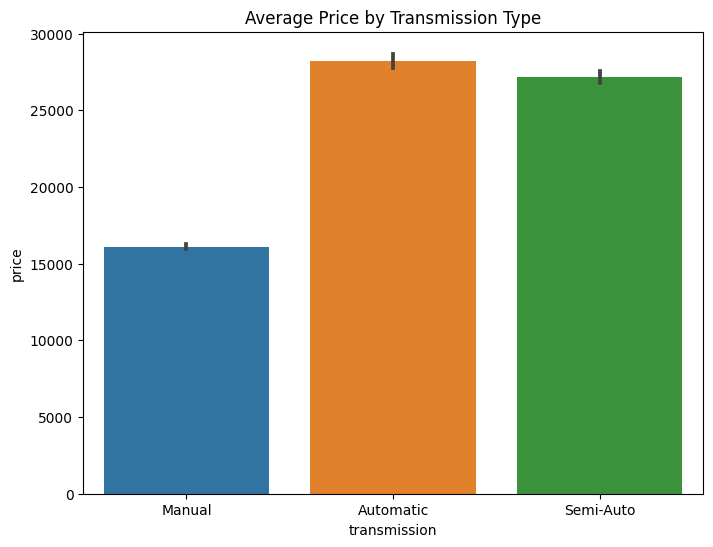

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(x='transmission', y='price', data=df)
plt.title("Average Price by Transmission Type")
plt.show()

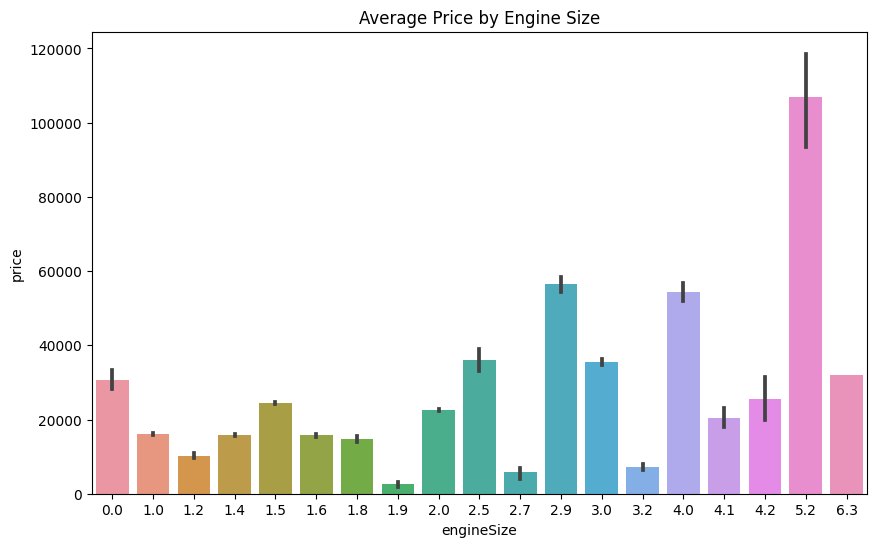

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='engineSize', y='price', data=df)
plt.title("Average Price by Engine Size")
plt.show()

 creating a scatter plot to visualize the relationship between the 'price' and other numerical columns: 'year', 'mileage', 'tax', 'mpg', and 'engineSize'. 

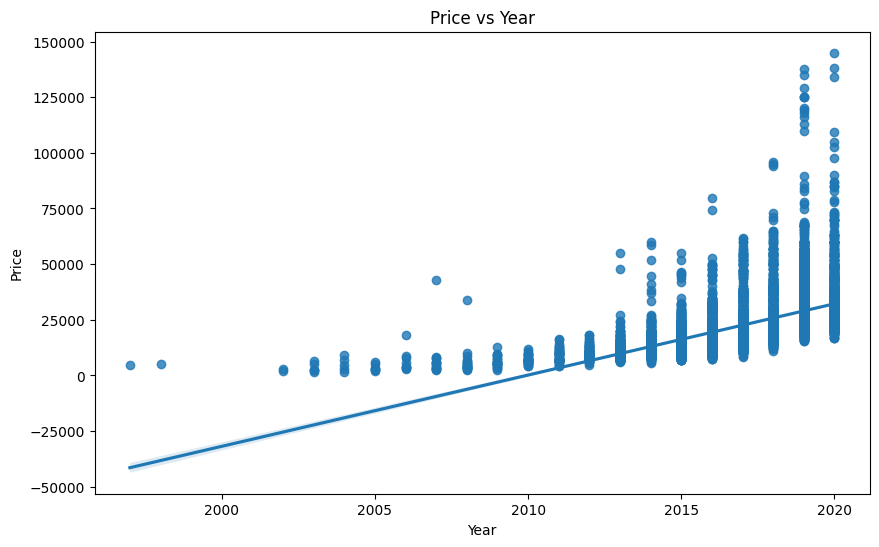

In [23]:
plt.figure(figsize=(10, 6))
sns.regplot(x='year', y='price', data=df)
plt.title('Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

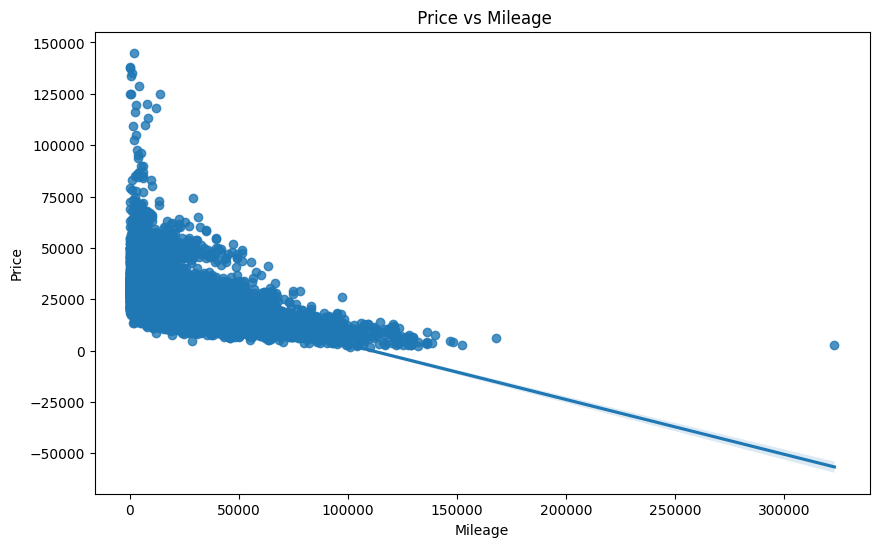

In [24]:
plt.figure(figsize=(10, 6))
sns.regplot(x='mileage', y='price', data=df)
plt.title(' Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

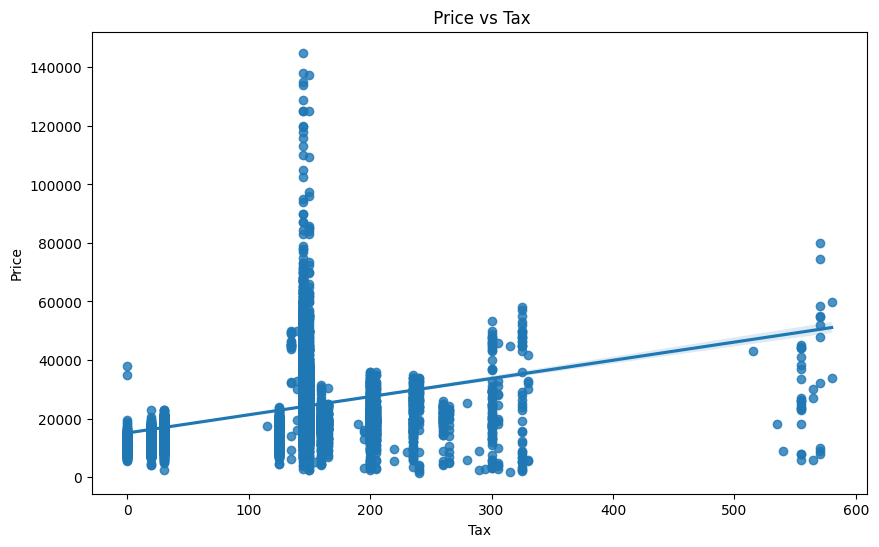

In [25]:
plt.figure(figsize=(10, 6))
sns.regplot(x='tax', y='price', data=df)
plt.title(' Price vs Tax')
plt.xlabel('Tax')
plt.ylabel('Price')
plt.show()

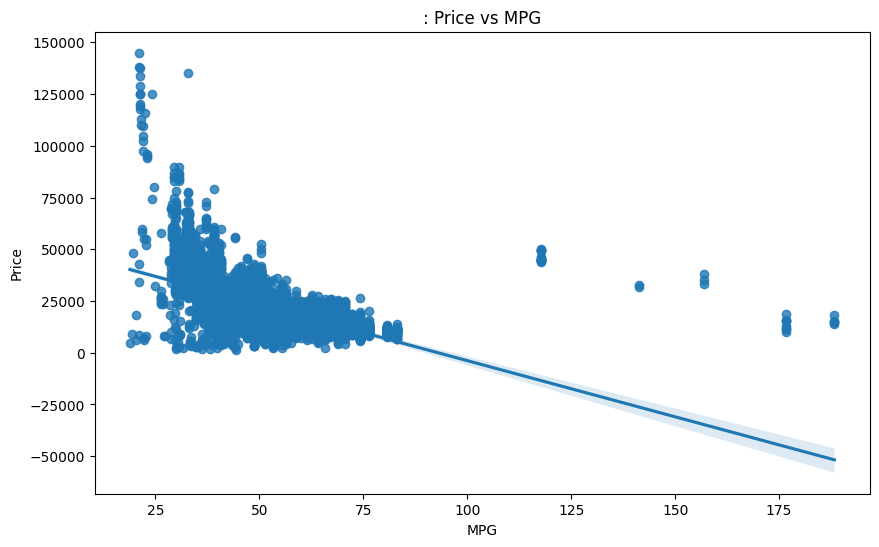

In [26]:
plt.figure(figsize=(10, 6))
sns.regplot(x='mpg', y='price', data=df)
plt.title(': Price vs MPG')
plt.xlabel('MPG')
plt.ylabel('Price')
plt.show()

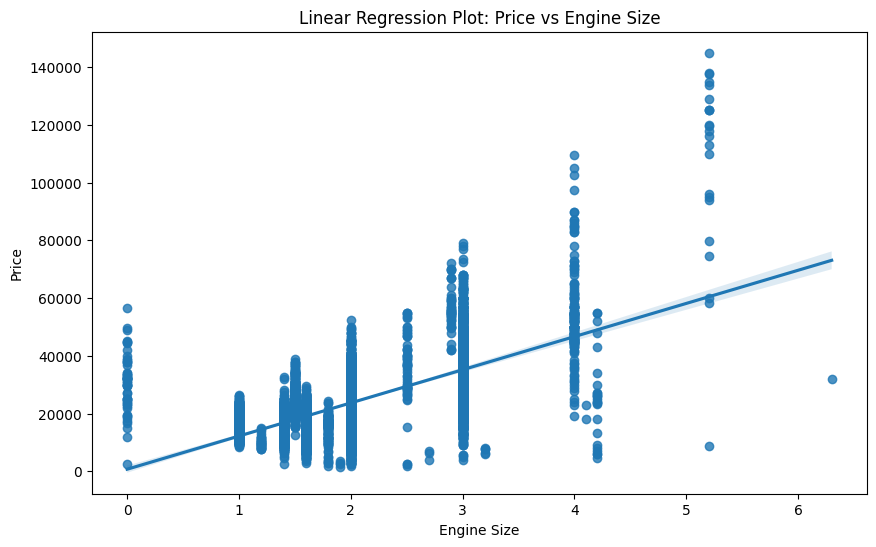

In [27]:
plt.figure(figsize=(10, 6))
sns.regplot(x='engineSize', y='price', data=df)
plt.title('Linear Regression Plot: Price vs Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

##mileage and mpg has neagtive relationship with price
##year ,tax and engine size has positive correlation with price

In [28]:
import pandas as pd
numerical_columns = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
correlation_matrix = df[['price'] + numerical_columns].corr()
print("Correlation Coefficients:")
print(correlation_matrix['price'])


Correlation Coefficients:
price         1.000000
year          0.592581
mileage      -0.535357
tax           0.356157
mpg          -0.600334
engineSize    0.591262
Name: price, dtype: float64


In [29]:
X = df.iloc[:,[0,1,3,4,5,6,7,8]].values
display (X.shape)
display (X)

(10668, 8)

array([[' A1', 2017, 'Manual', ..., 150, 55.4, 1.4],
       [' A6', 2016, 'Automatic', ..., 20, 64.2, 2.0],
       [' A1', 2016, 'Manual', ..., 30, 55.4, 1.4],
       ...,
       [' A3', 2020, 'Manual', ..., 150, 49.6, 1.0],
       [' Q3', 2017, 'Automatic', ..., 150, 47.9, 1.4],
       [' Q3', 2016, 'Manual', ..., 150, 47.9, 1.4]], dtype=object)

In [30]:
Y = df.iloc[:,[2]].values
display (Y.shape)
display (Y)


(10668, 1)

array([[12500],
       [16500],
       [11000],
       ...,
       [17199],
       [19499],
       [15999]], dtype=int64)

In [31]:
display(pd.DataFrame(X).head(5))

,0,1,2,3,4,5,6,7
0,A1,2017,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,Manual,1998,Petrol,145,49.6,1.0


using the LabelEncoder from scikit-learn to encode categorical variables into numerical representations.

In [32]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,-4] = le2.fit_transform(X[:,-4])
display (X)

array([[0, 2017, 'Manual', ..., 150, 55.4, 1.4],
       [5, 2016, 'Automatic', ..., 20, 64.2, 2.0],
       [0, 2016, 'Manual', ..., 30, 55.4, 1.4],
       ...,
       [2, 2020, 'Manual', ..., 150, 49.6, 1.0],
       [9, 2017, 'Automatic', ..., 150, 47.9, 1.4],
       [9, 2016, 'Manual', ..., 150, 47.9, 1.4]], dtype=object)

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[2])],remainder='passthrough')
X = ct.fit_transform(X)
display (X.shape)
display (pd.DataFrame(X))

(10668, 10)

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0,2017,15735,2,150,55.4,1.4
1,1.0,0.0,0.0,5,2016,36203,0,20,64.2,2.0
2,0.0,1.0,0.0,0,2016,29946,2,30,55.4,1.4
3,1.0,0.0,0.0,3,2017,25952,0,145,67.3,2.0
4,0.0,1.0,0.0,2,2019,1998,2,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
10663,0.0,1.0,0.0,2,2020,4018,2,145,49.6,1.0
10664,0.0,1.0,0.0,2,2020,1978,2,150,49.6,1.0
10665,0.0,1.0,0.0,2,2020,609,2,150,49.6,1.0
10666,1.0,0.0,0.0,9,2017,8646,2,150,47.9,1.4


In [34]:
display (pd.DataFrame(X))

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0,2017,15735,2,150,55.4,1.4
1,1.0,0.0,0.0,5,2016,36203,0,20,64.2,2.0
2,0.0,1.0,0.0,0,2016,29946,2,30,55.4,1.4
3,1.0,0.0,0.0,3,2017,25952,0,145,67.3,2.0
4,0.0,1.0,0.0,2,2019,1998,2,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
10663,0.0,1.0,0.0,2,2020,4018,2,145,49.6,1.0
10664,0.0,1.0,0.0,2,2020,1978,2,150,49.6,1.0
10665,0.0,1.0,0.0,2,2020,609,2,150,49.6,1.0
10666,1.0,0.0,0.0,9,2017,8646,2,150,47.9,1.4


using StandardScaler from scikit-learn to standardize the features in your dataset

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
display (pd.DataFrame(X))


,0,1,2,3,4,5,6,7,8,9
0,-0.583268,1.200728,-0.712333,-1.123544,-0.046450,-0.386836,1.050783,0.357147,0.357550,-0.880218
1,1.714479,-0.832828,-0.712333,-0.160831,-0.507834,0.483989,-0.954181,-1.578323,1.037130,0.114925
2,-0.583268,1.200728,-0.712333,-1.123544,-0.507834,0.217781,1.050783,-1.429440,0.357550,-0.880218
3,1.714479,-0.832828,-0.712333,-0.545916,-0.046450,0.047853,-0.954181,0.282706,1.276528,0.114925
4,-0.583268,1.200728,-0.712333,-0.738459,0.876318,-0.971285,1.050783,0.282706,-0.090355,-1.543647
...,...,...,...,...,...,...,...,...,...,...
10663,-0.583268,1.200728,-0.712333,-0.738459,1.337702,-0.885343,1.050783,0.282706,-0.090355,-1.543647
10664,-0.583268,1.200728,-0.712333,-0.738459,1.337702,-0.972136,1.050783,0.357147,-0.090355,-1.543647
10665,-0.583268,1.200728,-0.712333,-0.738459,1.337702,-1.030381,1.050783,0.357147,-0.090355,-1.543647
10666,1.714479,-0.832828,-0.712333,0.609339,-0.046450,-0.688442,1.050783,0.357147,-0.221637,-0.880218


In [36]:
from sklearn.model_selection import train_test_split
(X_train,X_test,Y_train,Y_test) = train_test_split(X,Y,test_size=0.2,random_state=0)
print (X.shape, Y.shape)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)


(10668, 10) (10668, 1)
(8534, 10) (8534, 1)
(2134, 10) (2134, 1)


In [37]:
from sklearn.ensemble import RandomForestRegressor
regression = RandomForestRegressor(random_state=0)
regression.fit(X_train,Y_train)
display (regression)

RandomForestRegressor(random_state=0)

In [38]:
y_pred = regression.predict(X_test)
display (y_pred)


array([14337.15, 23450.35, 27330.07, ..., 46275.18, 31359.  ,  9929.62])

In [39]:
from sklearn.metrics import r2_score,mean_absolute_error
print  ('R2 Score ', r2_score(Y_test, y_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y_test,y_pred))

R2 Score  0.9536134841307546
Mean Absolute Error 1538.730980670462


In [40]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)
print(reg)

LinearRegression()


In [41]:
y_pred = reg.predict(X_test)
display (y_pred)


array([[13053.98855476],
       [29341.7232484 ],
       [31897.81872271],
       ...,
       [42655.57745647],
       [31560.29943251],
       [ 7287.19116506]])

In [42]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[13053.98855476 14998.        ]
 [29341.7232484  21950.        ]
 [31897.81872271 28990.        ]
 ...
 [42655.57745647 45995.        ]
 [31560.29943251 30500.        ]
 [ 7287.19116506  8400.        ]]


In [43]:
from sklearn.metrics import r2_score,mean_absolute_error
print  ('R2 Score ', r2_score(Y_test, y_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y_test,y_pred))


R2 Score  0.7916101485136811
Mean Absolute Error 3381.4914189186106


In [44]:
y_pred = reg.predict(X)
display (y_pred)

array([[14621.39068406],
       [20625.72217798],
       [13802.51568406],
       ...,
       [19398.36085193],
       [20988.35350519],
       [16682.35350519]])

In [45]:
result = pd.concat([df,pd.DataFrame(y_pred)],axis=1)
display( result)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,0
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,14621.390684
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,20625.722178
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,13802.515684
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,19903.767545
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,17341.298352
...,...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0,19181.173352
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0,19268.235852
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0,19398.360852
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,20988.353505


In [48]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# create random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=3,cv=3,random_state=42, n_jobs = 1)


In [49]:
display (rCV.fit(X_train,Y_train))

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=3, n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [50]:
rf_pred=rCV.predict(X_test)
display (rf_pred)


array([14093.15934811, 23734.73088191, 28506.12773287, ...,
       48156.88898409, 31262.59937054, 10037.89212567])

Text(0, 0.5, 'Predicted Values')

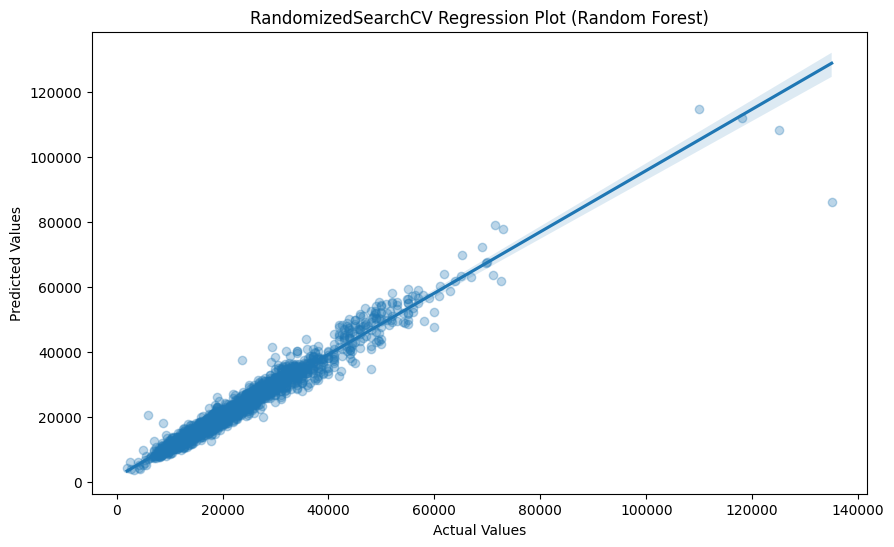

In [73]:
# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs. predicted values
sns.regplot(x=Y_test, y=rf_pred, scatter_kws={'alpha': 0.3})

# Adding labels and title
plt.title('RandomizedSearchCV Regression Plot (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(Y_test,rf_pred))
print('MSE',mean_squared_error(Y_test,rf_pred))


MAE 1505.6786347106051
MSE 5696028.419339891


In [52]:
display (r2_score(Y_test,rf_pred))

0.9585490196693475

In [58]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)  
xgb_model.fit(X_train, Y_train)
xgb_predictions = xgb_model.predict(X_test)
print('R2 Score:', r2_score(Y_test, xgb_predictions))
print('Mean Absolute Error:', mean_absolute_error(Y_test, xgb_predictions))

R2 Score: 0.9462287295911749
Mean Absolute Error: 1891.8971507278914


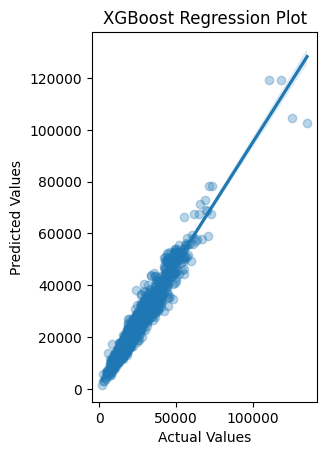

<Figure size 1000x600 with 0 Axes>

In [72]:
plt.subplot(1, 2, 2)
sns.regplot(x=Y_test, y=xgb_predictions, scatter_kws={'alpha':0.3})
plt.title('XGBoost Regression Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.figure(figsize=(10, 6))

plt.show()

##XGBRegressor gives 0.946 accuracy

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3) 
gb_model.fit(X_train, Y_train)
gb_predictions = gb_model.predict(X_test)
print('R2 Score:', r2_score(Y_test, gb_predictions))
print('Mean Absolute Error:', mean_absolute_error(Y_test, gb_predictions))

R2 Score: 0.9469513545297097
Mean Absolute Error: 1902.2081019166385


<Axes: title={'center': 'Gradient Boosting Regression Plot'}, xlabel='Actual Values', ylabel='Predicted Values'>

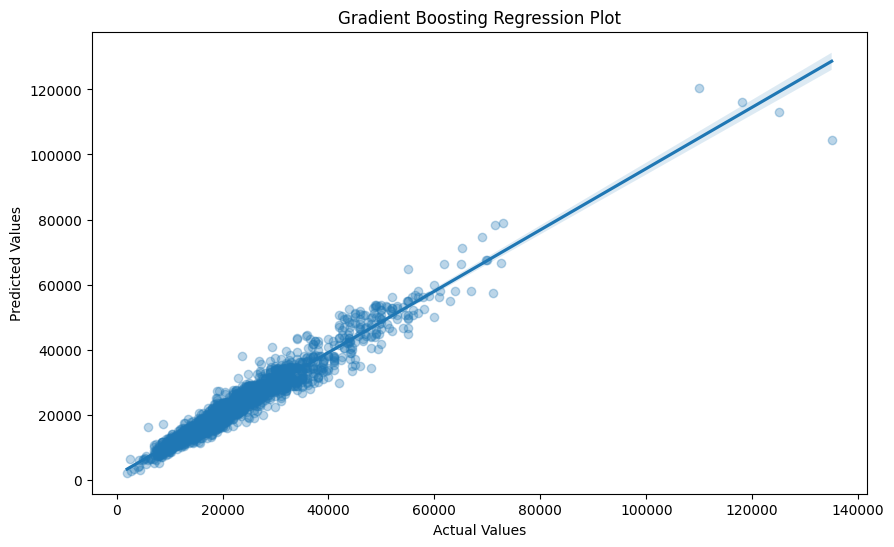

In [68]:
plt.figure(figsize=(10, 6))
plt.title('Gradient Boosting Regression Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
# Scatter plot of actual vs. predicted values
sns.regplot(x=Y_test, y=gb_predictions, scatter_kws={'alpha': 0.3})

GradientBoostingRegressor gives 0.94 accuracy